In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("C:\\Users\\NIKHIL\\OneDrive\\Documents\\ONE\\OneDrive\\Desktop\\disney_plus_titles (1).csv")

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [4]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1363,s1364,Movie,The Sword in the Stone,Wolfgang Reitherman,"Sebastian Cabot, Karl Swenson, Rickie Sorensen...",United States,"October 1, 2019",1963,G,80 min,"Action-Adventure, Animation, Comedy",Merlin trains a young orphan who's destined to...
1364,s1365,Movie,Those Calloways,Norman Tokar,"Brian Keith, Vera Miles, Brandon de Wilde, Wal...",United States,"October 1, 2019",1965,PG,132 min,"Animals & Nature, Drama, Family",A strong-willed family struggles to establish ...
1365,s1366,TV Show,Disney Kirby Buckets,NaN,"Jacob Bertrand, Mekai Curtis, Cade Sutton, Oli...",United States,NaN,2014,TV-Y7,3 Seasons,"Action-Adventure, Comedy, Coming of Age",Welcome to Kirby's world! It's rude and sketchy.
1366,s1367,TV Show,Disney Mech-X4,NaN,"Nathaniel Potvin, Raymond Cham, Kamran Lucas, ...",Canada,NaN,2016,TV-Y7,2 Seasons,"Action-Adventure, Comedy, Science Fiction",Ryan discovers his ability to control a giant ...
1367,s1368,TV Show,Imagination Movers,NaN,"Rich Collins, Dave Poche, Scott Durbin, Scott ...",United States,NaN,2008,TV-Y,3 Seasons,"Kids, Music","Rock out with the Imagination Movers, Disney J..."


In [5]:
data.describe()

,release_year
count,1368.000000
mean,2002.348684
std,22.127559
min,1928.000000
25%,1998.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


In [7]:
data.isnull().sum()

show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in         0
description       0
dtype: int64

In [8]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [12]:
data['director'].fillna('Unknown', inplace=True)
data['cast'].fillna('Unknown', inplace=True)
data['country'].fillna('Unknown', inplace=True)
data['date_added'].fillna('Unknown', inplace=True)
data['rating'].fillna('Unknown', inplace=True)
data['duration'].fillna('Unknown', inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      1368 non-null   object
 4   cast          1368 non-null   object
 5   country       1368 non-null   object
 6   date_added    1368 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1368 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB


In [14]:
data.describe()

,release_year
count,1368.000000
mean,2002.348684
std,22.127559
min,1928.000000
25%,1998.000000
50%,2011.000000
75%,2018.000000
max,2021.000000


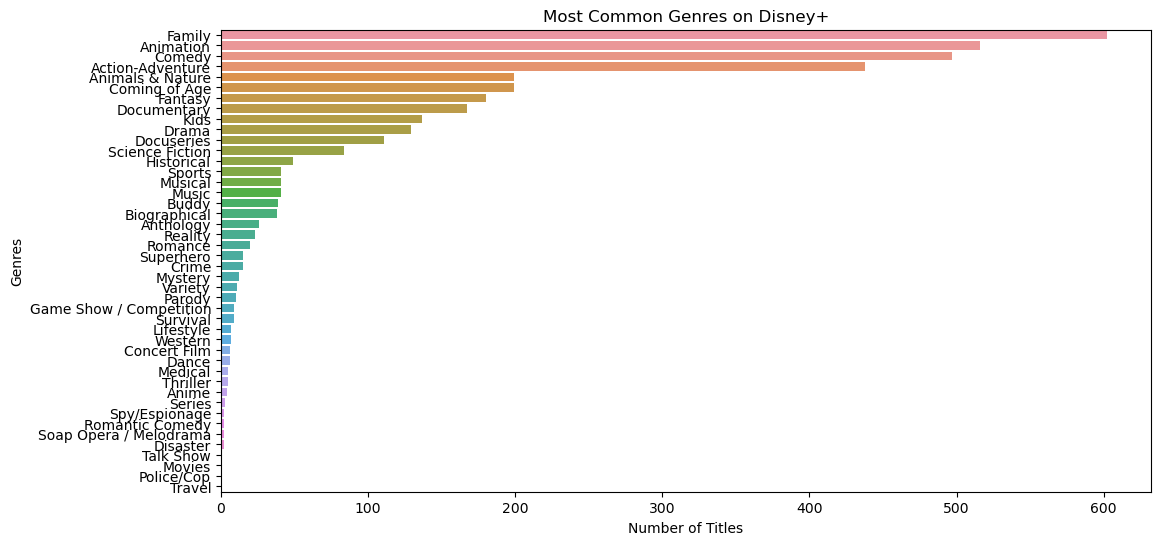

In [16]:
data['listed_in'] = data['listed_in'].str.split(', ')
genres = data.explode('listed_in')['listed_in'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=genres.values, y=genres.index)
plt.title('Most Common Genres on Disney+')
plt.xlabel('Number of Titles')
plt.ylabel('Genres')
plt.show()

C:\Users\NIKHIL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\NIKHIL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


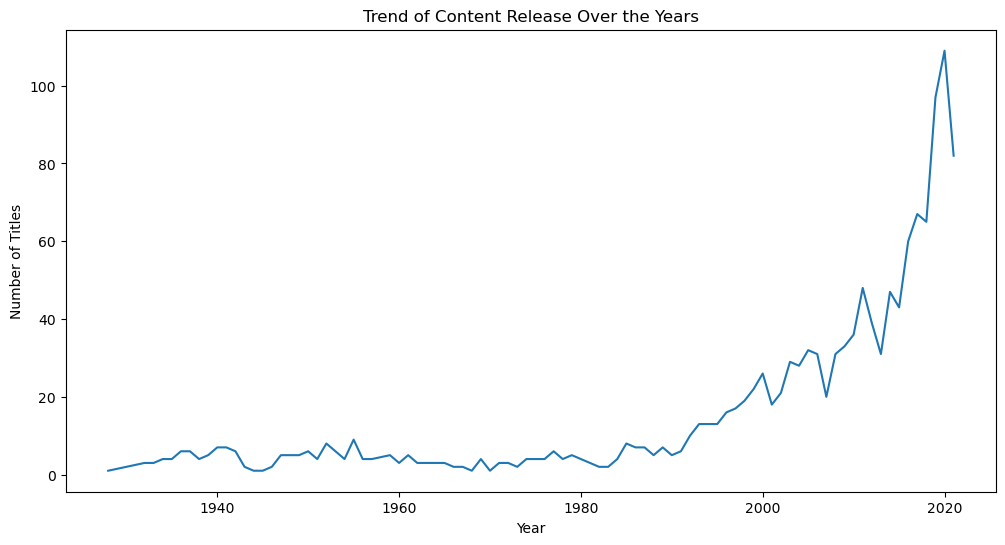

In [17]:
release_years = data['release_year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x=release_years.index, y=release_years.values)
plt.title('Trend of Content Release Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()


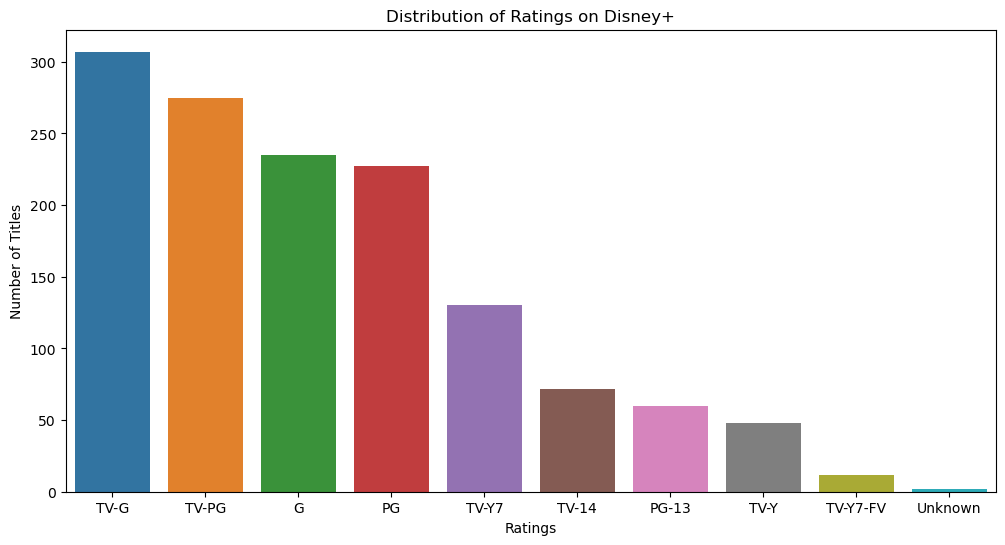

In [18]:
ratings = data['rating'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=ratings.index, y=ratings.values)
plt.title('Distribution of Ratings on Disney+')
plt.xlabel('Ratings')
plt.ylabel('Number of Titles')
plt.show()

In [19]:
data_movies = data[data['type'] == 'Movie']
data_shows = data[data['type'] == 'TV Show']

In [20]:
data_movies['duration'] = data_movies['duration'].str.replace(' min', '').astype(int)
data_shows['duration'] = data_shows['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)

C:\Users\NIKHIL\AppData\Local\Temp\ipykernel_26364\3035358851.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_movies['duration'] = data_movies['duration'].str.replace(' min', '').astype(int)
C:\Users\NIKHIL\AppData\Local\Temp\ipykernel_26364\3035358851.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_shows['duration'] = data_shows['duration'].str.replace(' Seasons', '').str.replace(' Season', '').astype(int)


C:\Users\NIKHIL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


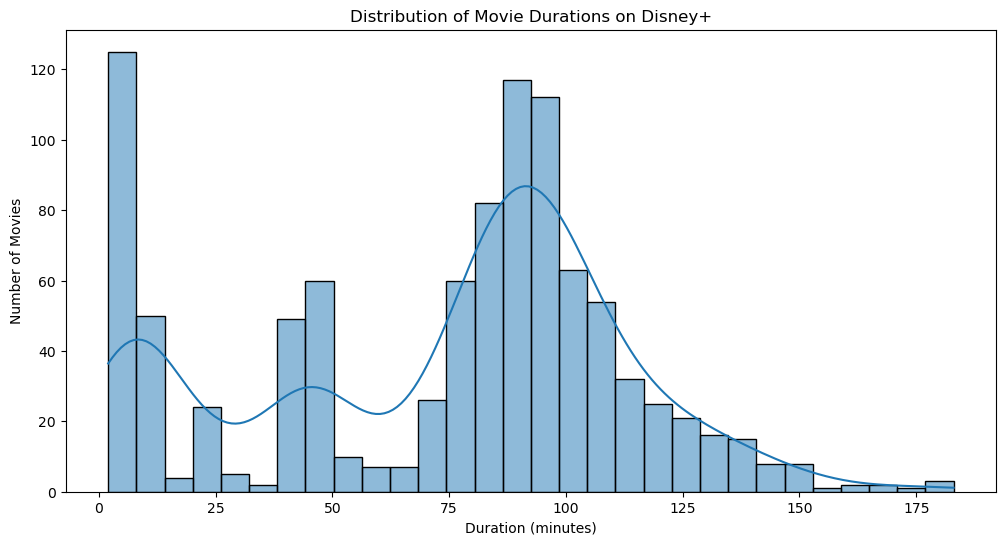

In [21]:
plt.figure(figsize=(12, 6))
sns.histplot(data_movies['duration'], bins=30, kde=True)
plt.title('Distribution of Movie Durations on Disney+')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.show()

C:\Users\NIKHIL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


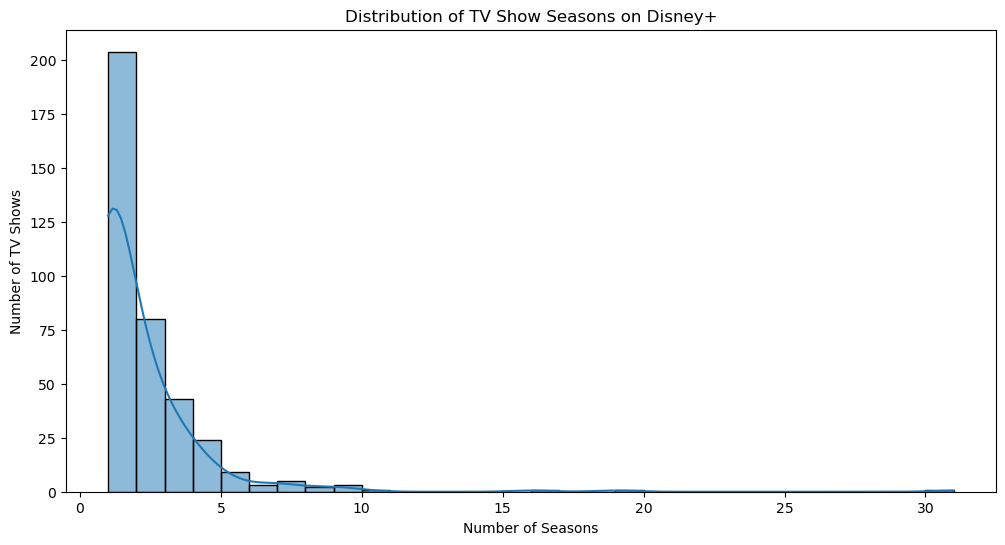

In [22]:
plt.figure(figsize=(12, 6))
sns.histplot(data_shows['duration'], bins=30, kde=True)
plt.title('Distribution of TV Show Seasons on Disney+')
plt.xlabel('Number of Seasons')
plt.ylabel('Number of TV Shows')
plt.show()

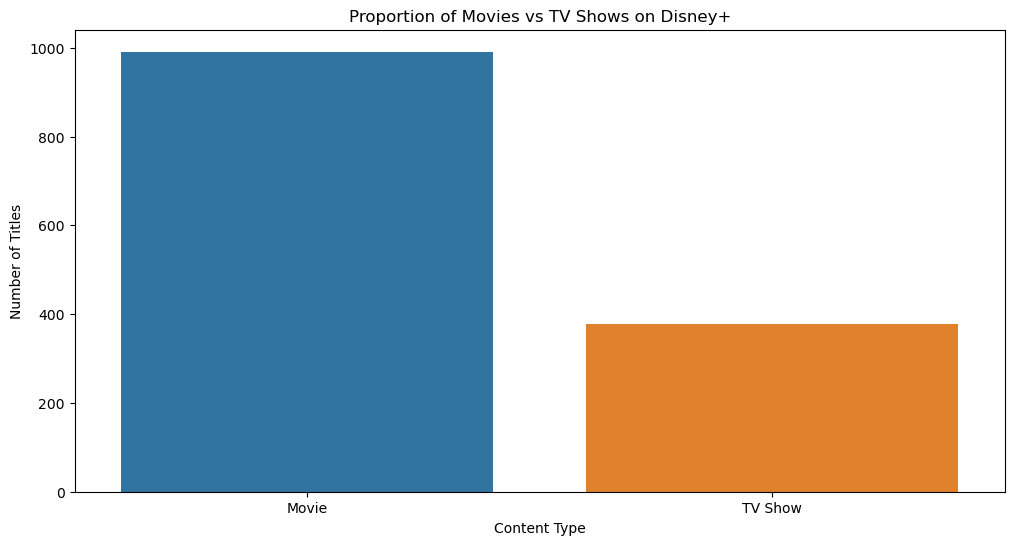

In [23]:
content_type = data['type'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=content_type.index, y=content_type.values)
plt.title('Proportion of Movies vs TV Shows on Disney+')
plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.show()